##  Clustering & PCA Assignment

### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

### Loading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Reading the data
countries = pd.read_csv('Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the number of rows and columns
countries.shape

(167, 10)

In [5]:
# Checking the column info
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# Checking the summary statistics
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Checking null values
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There seems to be no null values

In [8]:
# Since imports, exports and health columns are given as the percentage of the total gdp column, we need 
# to find out the real values
countries['imports'] = round((countries['imports'] * countries['gdpp']) / 100,2)
countries['exports'] = round((countries['exports'] * countries['gdpp']) / 100,2)
countries['health'] = round((countries['health'] * countries['gdpp']) / 100,2)
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [9]:
# Checking the data-types of columns again
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Data Visualisation

#### Visualising the numeric variables

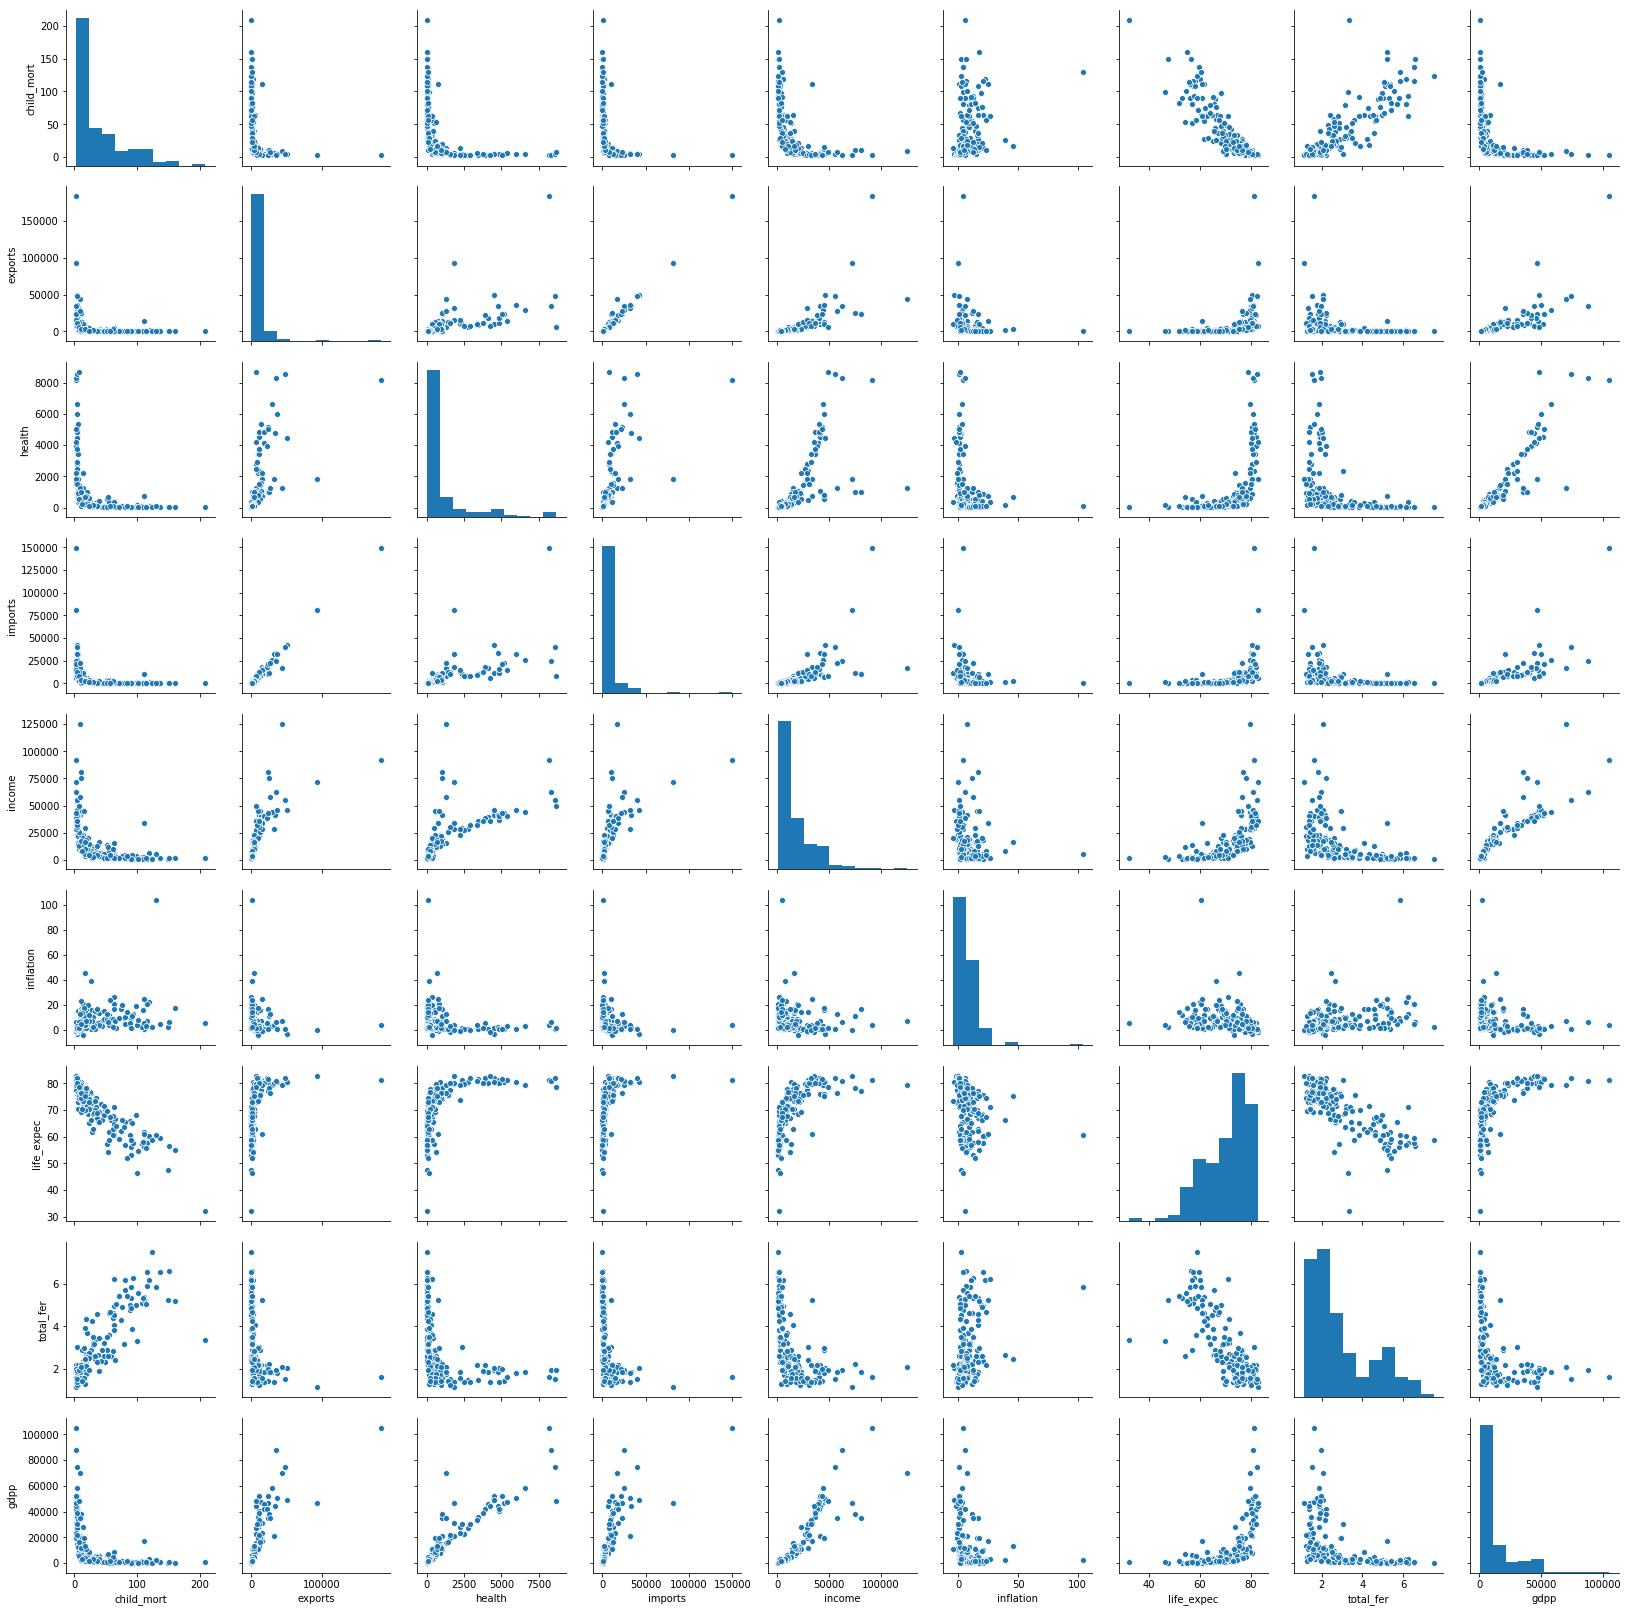

In [10]:
sns.pairplot(countries)
plt.show()

#### Inference from the above pairplot
* Countries with high gdpp have low child mortality rate and vice versa
* gdpp has a positive linear relationship with income. As the income increases, the gdpp also increases.
* life_expect is high for countries with high gdpp
* total_fer is low for countries with low gdpp and vice versa.

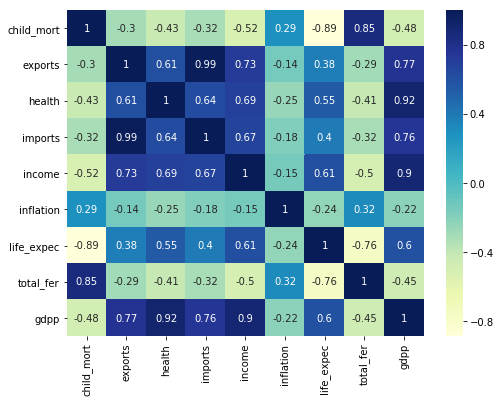

In [11]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8, 6))
sns.heatmap(countries.corr(), annot = True, cmap="YlGnBu")
plt.show()

GDPP seems to have strong positive relationship with Exports, Imports, Health, Income, life_expec and negative relationship with child_mort, inflation and total_fer.
Since our motive is to find out the under-developed countries on the basis of gdpp, child_mort and income variables, so need to look out for countries with high gdpp,income and low child_mort.

### Data Preparation

**Outlier Detection and Analysis before PCA**

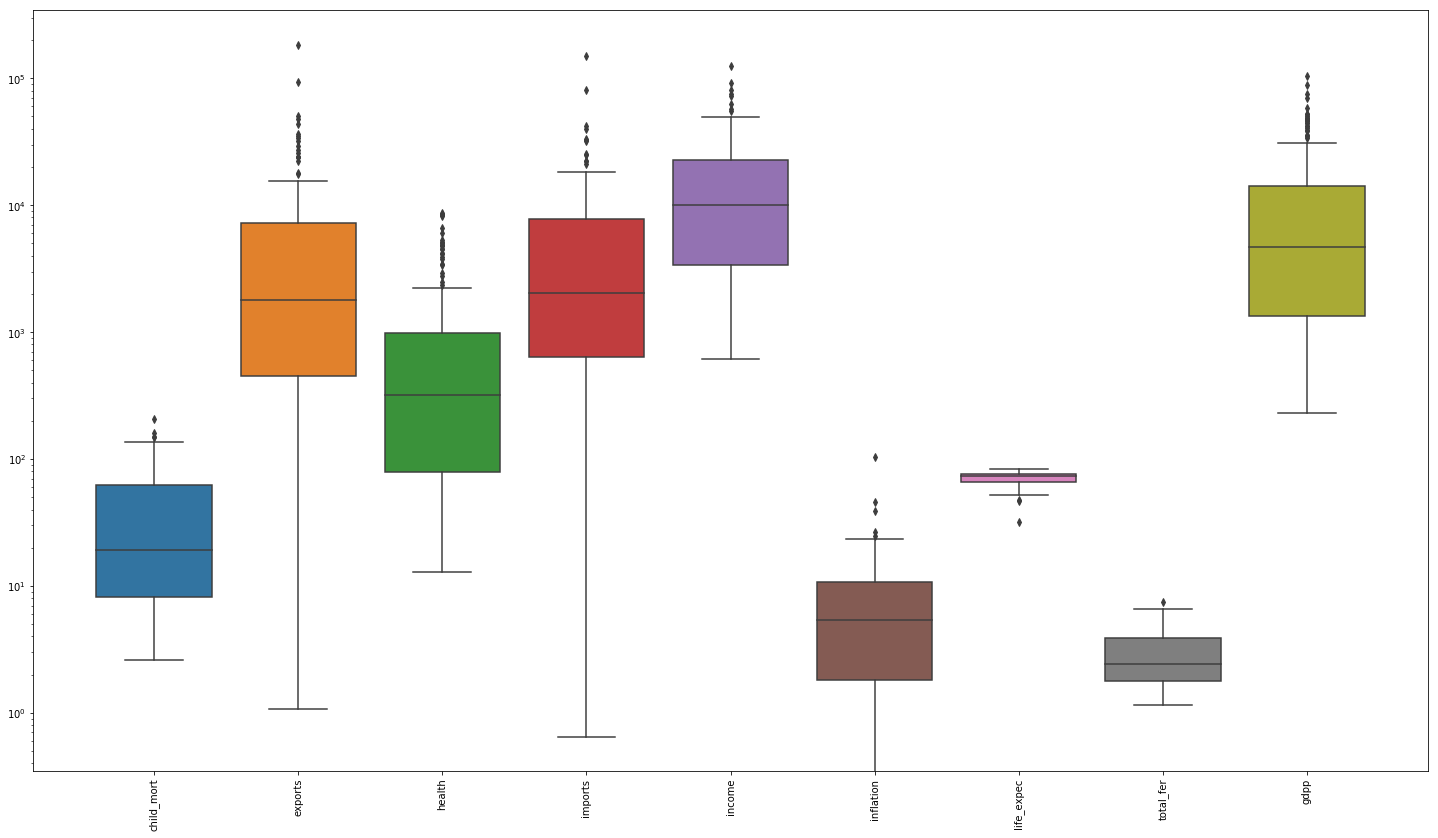

In [12]:
#Let's visualise using boxplots and check for outliers

num_cols = countries.select_dtypes([np.number]).columns
plt.figure(figsize=(25,14))
sns.boxplot(data=countries.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

We can see from the above graph that all variables have outliers. So, let's detect outliers in each of these columns.

In [13]:
# Finding outliers using Inter-Quartile range
Q1 = countries.quantile(0.25)
Q3 = countries.quantile(0.75)
IQR = Q3 - Q1
IQR

child_mort       53.850
exports        6830.860
health          898.405
imports        7079.385
income        19445.000
inflation         8.940
life_expec       11.500
total_fer         2.085
gdpp          12720.000
dtype: float64

In [14]:
# Let us look at the outlier values in gdpp column
outlier_df = pd.DataFrame()
Q1 = countries['gdpp'].quantile(0.25)
Q3 = countries['gdpp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['gdpp'] < lower_bound) | (countries['gdpp'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900


Though the above values have come as outliers, but they look genuine as these countries seem to be in good economic state and hence have high values of GDPP

In [15]:
# Let us look at the outlier values in total_fer column
outlier_df = pd.DataFrame()
Q1 = countries['total_fer'].quantile(0.25)
Q3 = countries['total_fer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['total_fer'] < lower_bound) | (countries['total_fer'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348


The total_fer is very high for country 'Niger' which also looks fine as we can see that the gdpp is pretty low and child_mort high

In [16]:
# Let us look at the outlier values in life_expec column
outlier_df = pd.DataFrame()
Q1 = countries['life_expec'].quantile(0.25)
Q3 = countries['life_expec'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['life_expec'] < lower_bound) | (countries['life_expec'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
66,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.98,129.87,1181.70,2380,4.15,46.5,3.30,1170


Life expectancy is pretty low in the above countries which may be due to poor facilities available to the people of these countries as we can clearly see that the child mortality rate is also high for these countries.

In [17]:
# Let us look at the outlier values in inflation column
outlier_df = pd.DataFrame()
Q1 = countries['inflation'].quantile(0.25)
Q3 = countries['inflation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['inflation'] < lower_bound) | (countries['inflation'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
49,Equatorial Guinea,111.0,14671.80,766.08,10071.90,33700,24.9,60.9,5.21,17100
103,Mongolia,26.1,1237.55,144.16,1502.55,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,589.49,118.13,405.42,5150,104.0,60.5,5.84,2330
149,Timor-Leste,62.6,79.20,328.32,1000.80,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,3847.50,662.85,2376.00,16500,45.9,75.4,2.47,13500


Inflation is pretty high in these countries with low values of GDPP.

In [18]:
# Let us look at the outlier values in income column
outlier_df = pd.DataFrame()
Q1 = countries['income'].quantile(0.25)
Q3 = countries['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['income'] < lower_bound) | (countries['income'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.500,76.5,1.87,35000


Income is pretty high in the above countries as is the gdpp.

In [19]:
# Let us look at the outlier values in child_mort column
outlier_df = pd.DataFrame()
Q1 = countries['child_mort'].quantile(0.25)
Q3 = countries['child_mort'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['child_mort'] < lower_bound) | (countries['child_mort'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
32,Chad,150.0,330.10,40.63,390.20,1930,6.39,56.5,6.59,897
66,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


The child mortality rate if pretty high in these countries which can be accounted for by the low gdpp. These countries have poor medical and health facilities.

In [20]:
# Let us look at the outlier values in imports column
outlier_df = pd.DataFrame()
Q1 = countries['imports'].quantile(0.25)
Q3 = countries['imports'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['imports'] < lower_bound) | (countries['imports'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100


These countries were detected as outliers for gdpp as well. Since, gdpp and imports have positive relationship , import will be high when gdpp is high indicating good economic condition of the country.

In [21]:
# Let us look at the outlier values in exports column
outlier_df = pd.DataFrame()
Q1 = countries['exports'].quantile(0.25)
Q3 = countries['exports'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['exports'] < lower_bound) | (countries['exports'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000


Same as imports. Exports are also high and gdpp is high for these countries too pointing to stability in the economy of the country.

In [22]:
# Let us look at the outlier values in health column
outlier_df = pd.DataFrame()
Q1 = countries['health'].quantile(0.25)
Q3 = countries['health'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_df = countries[((countries['health'] < lower_bound) | (countries['health'] > upper_bound))]
outlier_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
60,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900


These countries have high gdpp and income, hence showing good standard of living and facilities in the country. So, the health values are high.

**Decided not to remove outliers due to the below mentioned reasons:**

* Since they all look like genuine values considering the country and it’s economic condition. For e.g. Niger has very low income, gdpp and high value of child mortality which shows that the economic condition of the country is not stable and also points to poor standard of living and inadequate medical facilities.
* On the other hand Luxembourg showcases a stable economy due to its extremely high values of income, gdpp and low value of child mortality. It shows that the people of the country lead a good life with a good standard of life and good facilities.Also, removing outliers would mean removing a good number of countries which could impact our analysis in this scenario.
* Removing these countries do not make sense as we are supposed to analyse and find out the countries which are under-developed which might have extremely low values of gdpp, income etc. or high value of child mortality.

### Data Preparation

In [23]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
#Apply scaler to all variables except 'Yes=No' and dummy variables
num_vars = ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'imports' ,'exports', 'health']
countries_numdf = countries[num_vars]

#fit_transform
countries_scaled = scaler.fit_transform(countries_numdf)

countries_scaled.shape

F:\DataScience\Software\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\DataScience\Software\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(167, 9)

In [25]:
# Converting the countries_scaled to dataframe and assigning the column names as well
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = num_vars
countries_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports,exports,health
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.432275,-0.411011,-0.565038
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.313677,-0.350191,-0.439215
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.353720,-0.318526,-0.484827
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.345953,-0.291375,-0.532366
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0.040735,-0.104331,-0.178771


In [26]:
# Taking the category variable to a new dataframe to concat with the PCA components later
country_name = pd.DataFrame(countries['country'])
country_name.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


### Principal Component Analysis (PCA)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [28]:
pca.fit(countries_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# checking the components
pca.components_

array([[-0.31639186,  0.38004113, -0.14308532,  0.34385651, -0.30284223,
         0.39998795,  0.34486492,  0.34288671,  0.35853499],
       [ 0.47626736,  0.12838447,  0.22126086, -0.36981973,  0.45971522,
         0.2006241 ,  0.37078074,  0.39731091,  0.15505293],
       [-0.15001226,  0.14576424,  0.94841867,  0.19675172, -0.07783434,
         0.0103394 , -0.07217375, -0.03057357, -0.07570343],
       [-0.14805185, -0.15480589, -0.00762818, -0.01839485, -0.21392819,
        -0.36477234,  0.46179778,  0.44942527, -0.59971229],
       [ 0.10199508,  0.79407463, -0.1364234 , -0.15404182, -0.02033659,
         0.08750161, -0.25278675, -0.03853838, -0.49319955],
       [ 0.19658514, -0.03814788,  0.10840303, -0.58600962, -0.75390071,
         0.04538188, -0.01217966, -0.03891118,  0.18069951],
       [ 0.76126724, -0.02311309, -0.02207665,  0.5812085 , -0.27314529,
        -0.04402268,  0.02718245, -0.01366973, -0.06461567],
       [ 0.00644412,  0.39381131, -0.00607008,  0.00296583,  0

In [30]:
# checking the explained_variance_ratio for each column
pca.explained_variance_ratio_

array([5.89372979e-01, 1.84451687e-01, 9.91147192e-02, 6.07227850e-02,
       3.02917271e-02, 2.45982648e-02, 9.39743693e-03, 1.55641982e-03,
       4.93981448e-04])

Almost 93% variance in data is being explained by the first 4 components.

In [31]:
# Making a scree plot ith explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

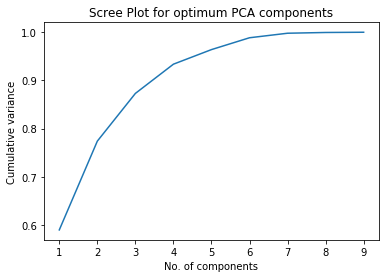

In [32]:
plt.title("Scree Plot for optimum PCA components")
plt.xlabel('No. of components')
plt.ylabel('Cumulative variance')
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

Almost 93% variance is explained by the first 4 components, the 5th and 6th component just add 0.05% variance. Hence, can consider 4 as the optimum number of components

<BarContainer object of 9 artists>

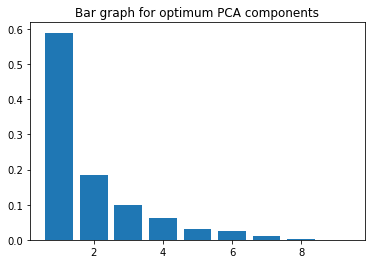

In [33]:
# Plotting a bar plot to check the optimum number of components
plt.title('Bar graph for optimum PCA components')
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

The bar plot also shows both 4 and 6 values, considering the amount of variance contributed by the first 4 components, taking 4 as the optimum number of components. So, let's go ahead and perform PCA with 4 components.

In [34]:
# perfrom PCA with 4 components
from sklearn.decomposition import IncrementalPCA

In [35]:
pca_final = IncrementalPCA(n_components=4)

In [36]:
countries_pca = pca_final.fit_transform(countries_scaled)

# Making a dataframe for convenience
countries_pca_df = pd.DataFrame(countries_pca, columns=['PC1','PC2','PC3','PC4'])
countries_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472086,-0.546500,0.237268
1,-0.023844,-1.435815,-0.009080,-0.442920
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723582,2.176018,0.597794,0.438917
4,0.648777,-1.026498,-0.244170,-0.267513


In [37]:
# Adding the country name to the countries_pca dataframe
countries_pca_final = pd.concat([countries_pca_df,country_name],axis=1)
countries_pca_final.head()

,PC1,PC2,PC3,PC4,country
0,-2.636647,1.472086,-0.546500,0.237268,Afghanistan
1,-0.023844,-1.435815,-0.009080,-0.442920,Albania
2,-0.459260,-0.678794,0.967852,-0.176389,Algeria
3,-2.723582,2.176018,0.597794,0.438917,Angola
4,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda


**Outlier Detection and Analysis after PCA**

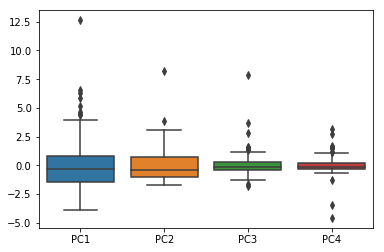

In [38]:
# Outlier detection
sns.boxplot(data=countries_pca_df.loc[:,:])

Outliers are there in all the components. Let's analyse in detail.

In [39]:
# Outliers for PC1
Q1 = countries_pca_final.PC1.quantile(0.25)
Q3 = countries_pca_final.PC1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pc1_outliers_df = countries_pca_final[(countries_pca_final.PC1 <= lower_bound) | (countries_pca_final.PC1 >= upper_bound)]
pc1_outliers_df

,PC1,PC2,PC3,PC4,country
44,4.379423,0.928432,-0.225448,1.502265,Denmark
73,4.659942,1.401536,-0.753864,-0.390515,Ireland
91,12.633634,8.219800,-0.571183,-4.587245,Luxembourg
110,4.495913,0.994065,-0.399318,0.765230,Netherlands
114,5.849351,1.669701,0.108885,2.698596,Norway
123,5.131518,1.463101,1.120466,0.822405,Qatar
133,6.582494,2.913633,-0.224591,-3.496339,Singapore
145,6.266760,1.858416,-0.513419,1.579528,Switzerland


In [40]:
# Outliers for PC2
Q1 = countries_pca_final.PC2.quantile(0.25)
Q3 = countries_pca_final.PC2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pc2_outliers_df = countries_pca_final[(countries_pca_final.PC2 <= lower_bound) | (countries_pca_final.PC2 >= upper_bound)]
pc2_outliers_df

,PC1,PC2,PC3,PC4,country
91,12.633634,8.219800,-0.571183,-4.587245,Luxembourg
113,-3.931333,3.825005,7.867898,0.576286,Nigeria


In [41]:
# Outliers for PC3
Q1 = countries_pca_final.PC3.quantile(0.25)
Q3 = countries_pca_final.PC3.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pc3_outliers_df = countries_pca_final[(countries_pca_final.PC3 <= lower_bound) | (countries_pca_final.PC3 >= upper_bound)]
pc3_outliers_df

,PC1,PC2,PC3,PC4,country
5,0.036447,-0.684622,1.465361,0.066068,Argentina
23,2.698699,0.376828,1.622200,0.306712,Brunei
31,-3.238143,2.182755,-1.613568,0.254537,Central African Republic
66,-3.938185,3.045279,-1.798863,0.068250,Haiti
103,-1.269899,0.076301,2.771375,-0.330800,Mongolia
113,-3.931333,3.825005,7.867898,0.576286,Nigeria
128,0.912249,0.033512,1.288448,0.252008,Saudi Arabia
140,-0.546368,-0.953157,1.585379,-0.397249,Sri Lanka
149,-2.008268,1.085279,1.386852,0.437889,Timor-Leste
163,-0.313054,-0.016860,3.661137,0.034534,Venezuela


In [42]:
# Outliers for PC4
Q1 = countries_pca_final.PC4.quantile(0.25)
Q3 = countries_pca_final.PC4.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pc4_outliers_df = countries_pca_final[(countries_pca_final.PC4 <= lower_bound) | (countries_pca_final.PC4 >= upper_bound)]
pc4_outliers_df

,PC1,PC2,PC3,PC4,country
7,3.184361,-0.238373,-0.168540,1.669696,Australia
29,3.397763,-0.065365,-0.098953,1.574294,Canada
44,4.379423,0.928432,-0.225448,1.502265,Denmark
54,2.895205,-0.297691,-0.255812,1.477010,France
58,3.302161,-0.155142,-0.280614,1.124339,Germany
77,2.862279,-0.867783,-0.397723,1.525401,Japan
91,12.633634,8.219800,-0.571183,-4.587245,Luxembourg
98,2.632407,0.074395,-0.037326,-1.274364,Malta
114,5.849351,1.669701,0.108885,2.698596,Norway
133,6.582494,2.913633,-0.224591,-3.496339,Singapore


**Reasons for not removing the Outliers**

* After detecting the above outliers, carried out clustering after removing the outliers. Almost 27 countries were removed and eventually the clusters that were formed had the same countries as we got without removing the outliers, only difference being we have missed out clustering few countries as they were removed as outliers.
* In the list of 27 countries that were removed, few were supposed to have come in the cluster of under-developed countries due to their extremely low values of gdpp, income and high values of child_mort. Also, only because some countries have high values of gdpp, income or vice-versa do not mean that they are outliers, instead they point towards the economic condition and stability of the country.
* So, outlier removal does not look like a necessary step in this scenario and hence not going forward with the same.

**Hopkins Statistic function to check the cluster tendency**

In [43]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(countries_scaled)

0.9333669104428121

This value shows that the data has high tendency to cluster

F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


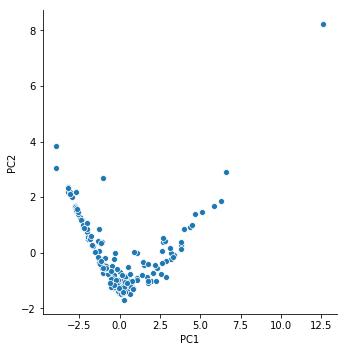

In [46]:
# Plotting the data( components along with countries)
sns.pairplot(data=countries_pca_df, x_vars=["PC1"], y_vars=["PC2"], size=5)

**Inference from the above scatter-plot**

* In the scatter plot given above, we can see that there are around three clusters formed.

We will get a clearer picture with further analysis.

In [47]:
countries_pca_df.shape

(167, 4)

In [48]:
countries_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472086,-0.546500,0.237268
1,-0.023844,-1.435815,-0.009080,-0.442920
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723582,2.176018,0.597794,0.438917
4,0.648777,-1.026498,-0.244170,-0.267513


In [49]:
# correlation matrix
corrmat = np.corrcoef(countries_pca_df.transpose())

In [50]:
corrmat.shape

(4, 4)

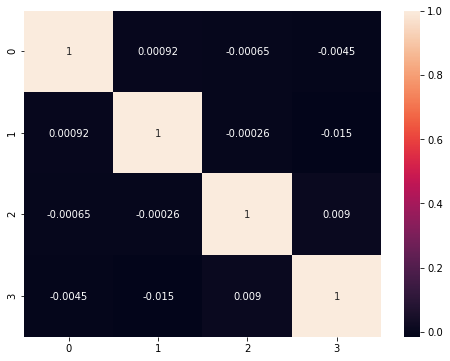

In [51]:
# plotting heatmap of the matrix
plt.figure(figsize=[8,6])
sns.heatmap(corrmat, annot=True)

### Modelling

### K-means

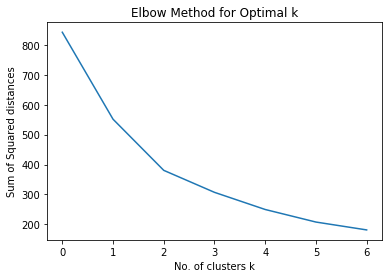

In [52]:
# Finding the optimum number of clusters - elbow curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_n_clusters:
    kmeans = KMeans(n_clusters = num, max_iter=50, random_state=100)
    kmeans.fit(countries_pca_df)
    ssd.append(kmeans.inertia_)

# plott ssd
plt.title('Elbow Method for Optimal k')
plt.xlabel('No. of clusters k')
plt.ylabel('Sum of Squared distances')
plt.plot(ssd)

The elbow-curve is showing 1 or 2 which corresponds to 2 or 3 clusters as the x-axis here shows the index values.

In [53]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_n_clusters:
    kmeans = KMeans(n_clusters = num, max_iter=50, random_state=100)
    kmeans.fit(countries_pca_df)
    
    cluster_labels = kmeans.labels_
    
    # score
    silhouette_avg = silhouette_score(countries_pca_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48686868082501256
For n_clusters=3, the silhouette score is 0.4670619767579729
For n_clusters=4, the silhouette score is 0.47659197367700823
For n_clusters=5, the silhouette score is 0.47877634668130503
For n_clusters=6, the silhouette score is 0.4423803952196472
For n_clusters=7, the silhouette score is 0.3750771275651341
For n_clusters=8, the silhouette score is 0.3839950403055698


The silhouette-score for k=2 is maximum so that should be the optimum value of k. Let's go ahead and try clustering with k=2

In [54]:
# Let's create a model with k=2
kmeans = KMeans(n_clusters = 2, max_iter=50, random_state=100)
kmeans.fit(countries_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [55]:
# Checking the labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [56]:
# Assign the cluster id
countries['cluster_id'] = kmeans.labels_
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0


In [57]:
countries['cluster_id'].value_counts()

0    130
1     37
Name: cluster_id, dtype: int64

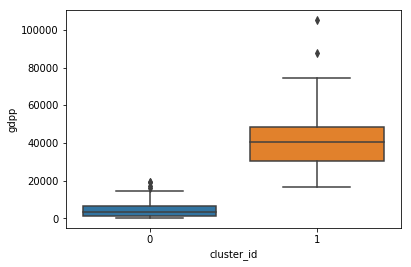

In [58]:
# plot for gdpp
sns.boxplot(x='cluster_id', y='gdpp', data=countries)

In [59]:
# lowest gdpp
countries.loc[countries['cluster_id']==0 ,['country', 'gdpp']].sort_values(by=['gdpp']).head()

,country,gdpp
26,Burundi,231
88,Liberia,327
37,"Congo, Dem. Rep.",334
112,Niger,348
132,Sierra Leone,399


In [60]:
# high gdpp
countries.loc[countries['cluster_id']==1,['country', 'gdpp']].head()

,country,gdpp
7,Australia,51900
8,Austria,46900
10,Bahamas,28000
11,Bahrain,20700
15,Belgium,44400


As we can see here, two clusters have been formed but we would like to get clusters which give us an idea about three categories like developed, developing and under-developed countries. So, that only countries with low gdpp,income and high child_mort are present in the under-developed category.

So, let us go ahead and create clusters with k=3 and check how it goes.

In [61]:
# final model with k=3
kmeans = KMeans(n_clusters = 3, max_iter=50, random_state=100)
kmeans.fit(countries_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [62]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [63]:
# Dropping the cluster_id column
countries = countries.drop('cluster_id', axis=1)

In [64]:
# Assign the cluster id
countries['cluster_id'] = kmeans.labels_
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1


### Cluster Profiling for K-means

In [65]:
# Creating three dataframes for the three variables the original dataframe grouped by gdpp, child_mort
# and income variables
gdpp_m = pd.DataFrame(countries.groupby(['cluster_id']).gdpp.mean())
childmort_m = pd.DataFrame(countries.groupby(['cluster_id']).child_mort.mean())    
income_m = pd.DataFrame(countries.groupby(['cluster_id']).income.mean())

In [66]:
# Concat all three dataframes
final_df = pd.concat([gdpp_m, childmort_m, income_m], axis=1)

In [67]:
# Seeing the final_df
final_df.head()

,gdpp,child_mort,income
cluster_id,,,
0,48114.285714,5.046429,50178.571429
1,7979.912088,20.357143,13968.021978
2,1909.208333,91.610417,3897.354167


So, clearly cluster-2 countries have lowest average of gdpp, income values and highest child_mort.Hence, they seem to be under-developed countries which are in urgent need of help. Cluster-0 countries have highest gdpp, income and low values of child_mort.
We will do some visaulizations and do further analysis

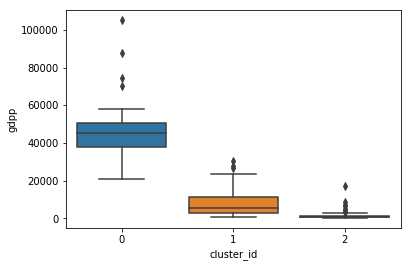

In [68]:
# plot for gdpp
sns.boxplot(x='cluster_id', y='gdpp', data=countries)

In [69]:
# highest gdpp
countries.loc[countries['cluster_id']==0,['country', 'gdpp']].head()

,country,gdpp
7,Australia,51900
8,Austria,46900
15,Belgium,44400
23,Brunei,35300
29,Canada,47400


In [70]:
# lowest gdpp
lowgdpp_df = countries.loc[countries['cluster_id']==2,['country','gdpp']].sort_values(by=['gdpp'])
lowgdpp_df = lowgdpp_df.set_index('country')
lowgdpp_df.head()

,gdpp
country,
Burundi,231
Liberia,327
"Congo, Dem. Rep.",334
Niger,348
Sierra Leone,399


In [71]:
# cluster-1 for gdpp
countries.loc[countries['cluster_id']==1,['country']].head()

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia


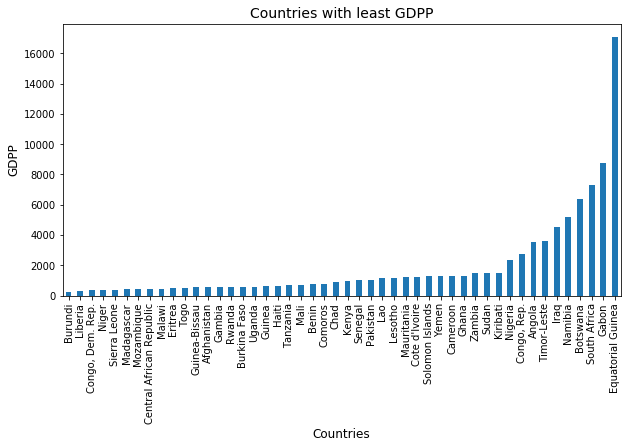

In [72]:
# Plotting and seeing the countries with least gdpp
lowgdpp_df['gdpp'].plot(kind="bar", figsize=(10,5))
plt.xlabel('Countries',fontsize=12)
plt.ylabel('GDPP',fontsize=12)
plt.title('Countries with least GDPP',fontsize=14)
plt.show()

As per the above graphs, few countries with least gdpp are :
* Burundi
* Liberia
* Comgo, Dem. Rep.
* Niger
* Sierra Leone
* Madagascar
* Mozambique
* Central African Republic
* Malawi
* Eritrea
* Togo
* Guinea-Bissau
* Afganistan
* Gambia
* Rwanda
* Burkina Faso
* Uganda
* Guinea
* Haiti
* Tanzania
* Mali

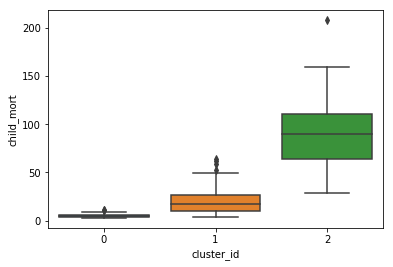

In [73]:
# plot for child_mort variable
sns.boxplot(x='cluster_id', y='child_mort', data=countries)

In [74]:
# highest child_mort
highchild_mortdf = countries.loc[countries['cluster_id']==2,['country','gdpp','child_mort']].sort_values(by=['child_mort'], ascending=False)
highchild_mortdf = highchild_mortdf.set_index('country')
highchild_mortdf.head()

,gdpp,child_mort
country,,
Haiti,662,208.0
Sierra Leone,399,160.0
Chad,897,150.0
Central African Republic,446,149.0
Mali,708,137.0


In [75]:
# lowest child_mort
countries.loc[countries['cluster_id']==0,'country'].head()

7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

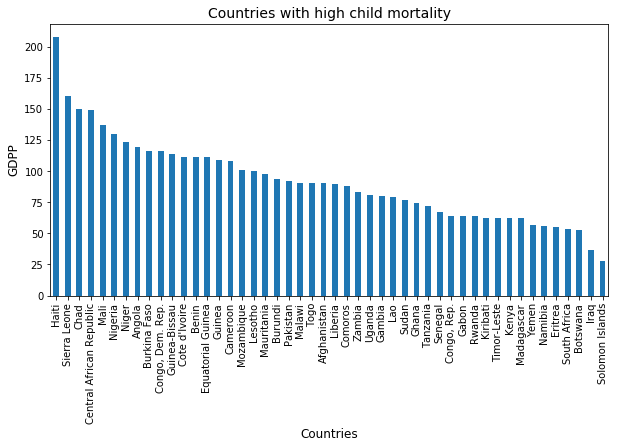

In [76]:
# Plotting and seeing the countries with high child_mort
highchild_mortdf['child_mort'].plot(kind="bar", figsize=(10,5))
plt.xlabel('Countries',fontsize=12)
plt.ylabel('GDPP',fontsize=12)
plt.title('Countries with high child mortality',fontsize=14)
plt.show()

So, we can clearly see that few countries with high child mortality are :
* Haiti
* Sierra Leone
* Chad
* Central African Republic
* Mali
* Nigeria
* Niger
* Angola
* Burkina Faso
* Congo, Dem. Rep.
* Guinea-Bissau
* Cote d'lvoire
* Benin
* Equatorial Guinea

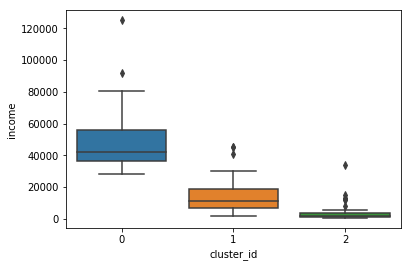

In [77]:
# plot for income variable
sns.boxplot(x='cluster_id', y='income', data=countries)

In [78]:
# highest income
countries.loc[countries['cluster_id']==0,'country'].head()

7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

In [79]:
# lowest income
lowincome_df = countries.loc[countries['cluster_id']==2,['country','gdpp','income']].sort_values(by=['income'])
lowincome_df = lowincome_df.set_index('country')
lowincome_df.head()

,gdpp,income
country,,
"Congo, Dem. Rep.",334,609
Liberia,327,700
Burundi,231,764
Niger,348,814
Central African Republic,446,888


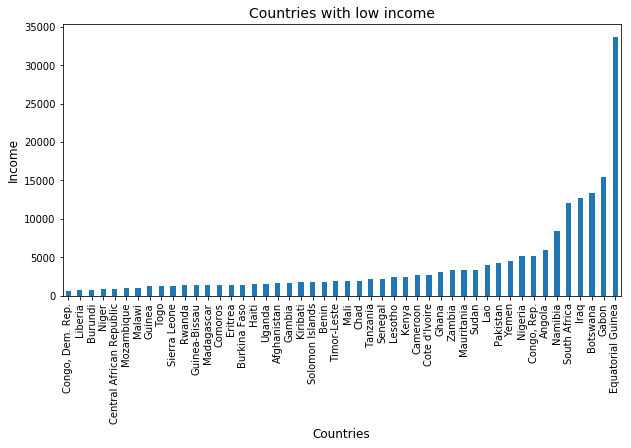

In [80]:
# Bar plot them for the countries
lowincome_df['income'].plot(kind="bar", figsize=(10,5), width=0.45)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Countries with low income',fontsize=14)
plt.show()

We can clearly infer from the above graph, that the countries with very low income are:
* Congo, Dem. Rep.
* Liberia
* Burundi
* Niger
* Central African Republic
* Mozambique
* Malawi
* Guinea
* Togo
* Sierra Leone
* Rwanda
* Guinea-Bissau
* Maddagascar

In [81]:
# Looking at the final df with cluster_id column added.
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1


In [82]:
# assigning cluster to the principal components dataframe as well.
countries_pca_final['cluster_id'] = kmeans.labels_
countries_pca_final.head()

,PC1,PC2,PC3,PC4,country,cluster_id
0,-2.636647,1.472086,-0.546500,0.237268,Afghanistan,2
1,-0.023844,-1.435815,-0.009080,-0.442920,Albania,1
2,-0.459260,-0.678794,0.967852,-0.176389,Algeria,1
3,-2.723582,2.176018,0.597794,0.438917,Angola,2
4,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda,1


F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


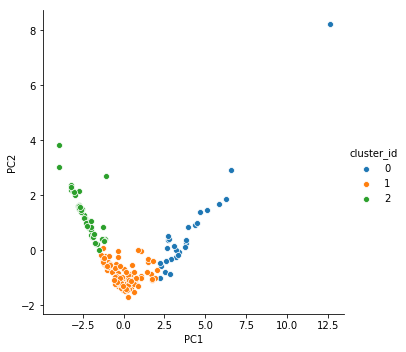

In [83]:
# Plotting the data( components along with countries)
sns.pairplot(data=countries_pca_final, x_vars=["PC1"], hue='cluster_id',y_vars=["PC2"], size=5)

So, we can see the three clusters plotted w.r.t PC1 and PC2. Cluster-2 as analysed above seems to have low values and cluster-0 has high values. The countries in cluster-2 seem to be under-developed and in need of help.

F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


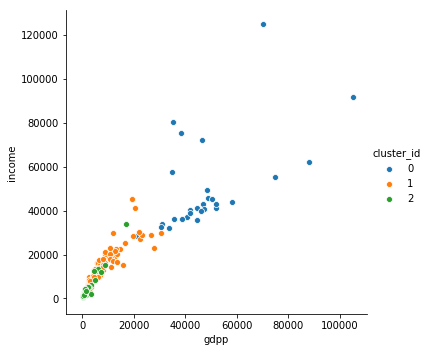

In [84]:
# Plotting the data between gdpp and income
sns.pairplot(data=countries, x_vars=["gdpp"], y_vars=["income"], hue='cluster_id', size=5)

**Inference from the above graph which shows relationship between gdpp and income**

GDPP and income have a positive linear relationship. Also, we can see cluster-2 countries have low income and low gdpp. Similarly the cluster-0 countries have high income and high gdpp.

So, the cluster-2 countries seem to be under-developed as they have low income and low gdpp.

F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


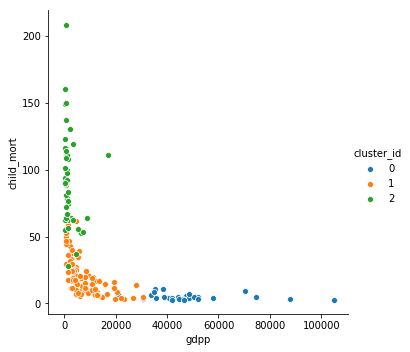

In [85]:
# Plotting the data between gdpp and child_mort
sns.pairplot(data=countries, x_vars=["gdpp"], y_vars=["child_mort"], hue='cluster_id', size=5)

**Inference from the above graph which shows relationship between gdpp and child_mort**

Cluster-2 countries seem to have extremely high child_mort values and low gdpp as well. Cluster-1 countries lie somewhere in middle as they have moderate child_mort and low gdpp.
On the other hand, cluster-0 countries have very low child mort and high gdpp.

So, we can infer that cluster-2 countries look like under-developed as they have extremely high child_mort and low gdpp.

F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


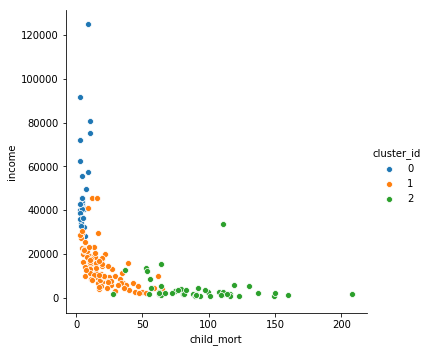

In [86]:
# Plotting the data between child_mort and income
sns.pairplot(data=countries, x_vars=["child_mort"], y_vars=["income"], hue='cluster_id', size=5)

**Inference from the above graph which shows relationship between child_mort and income**

Cluster-2 countries seem to have extremely high child_mort values and low income. Cluster-1 countries lie somewhere in middle as they have moderate child_mort and income.
On the other hand, cluster-0 countries have very low child mort and high income.

So, we can infer that cluster-2 countries look like underdeveloped as they have extremely high child_mort and low income.

In [87]:
# list of cluster-2 countries i.e. underdeveloped countries
countries.loc[countries['cluster_id']==2,['country','gdpp', 'income', 'child_mort']]

,country,gdpp,income,child_mort
0,Afghanistan,553,1610,90.2
3,Angola,3530,5900,119.0
17,Benin,758,1820,111.0
21,Botswana,6350,13300,52.5
25,Burkina Faso,575,1430,116.0
26,Burundi,231,764,93.6
28,Cameroon,1310,2660,108.0
31,Central African Republic,446,888,149.0
32,Chad,897,1930,150.0
36,Comoros,769,1410,88.2


### Inference from K-means clustering with PCA

* The cluster-2 countries seem to be under-developed as the factors that steer growth and development like gdpp and income are quiet low for this cluster. Whereas, the child_mort is pretty high which points to poor living conditions, medical facilities etc.

* On the other hand, cluster-0 countries seem to have developed countries which have high values of gdpp, income and low values of child_mort.

* Cluster-1 countries look like developing or emerging countries as they have moderate income, gdpp and child_mort

So, we can conclude that the countries in cluster-2 require urgent help.Listing a few countries out of these that are on priority:
* Burundi
* Liberia
* Congo, Dem. rep.
* Niger
* Sierra Leone
* Haiti
* Mozambique
* Central African Republic

### Hierarchical Clustering

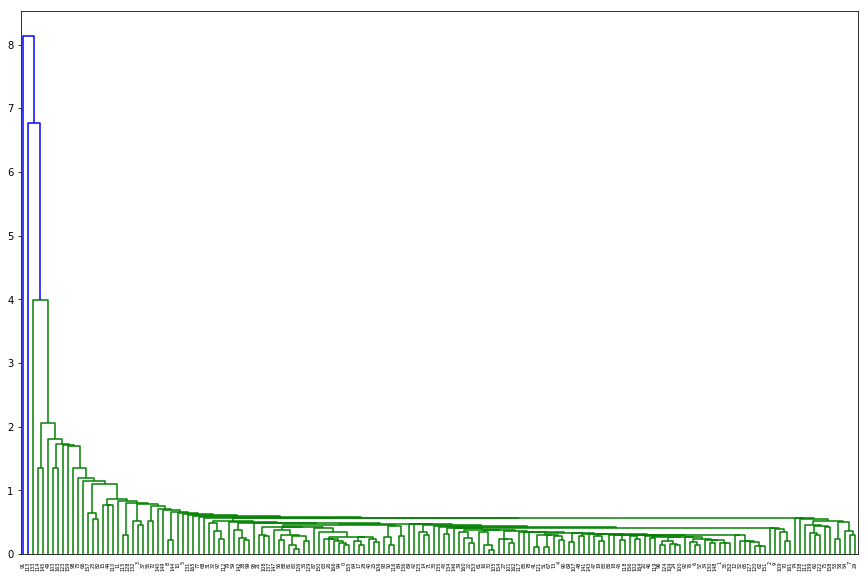

In [88]:
# single linkage
plt.figure(figsize=(15,10))
mergings = linkage(countries_pca_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

We can see from the above graph, one of the clusters has just one country represented by blue line. So, let us try with 3 clusters first.

In [89]:
# Checking with 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1,0


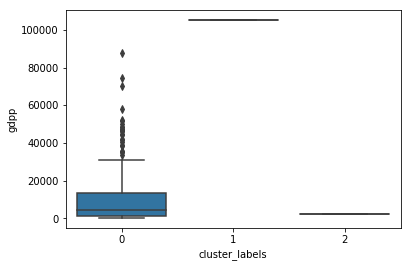

In [91]:
# plot for gdpp across all clusters
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)

As predicted above, cluster-2 seems to have just one country.Also, seems like most of the countries have been put in cluster-0. Let us check what all countries are present in the above clusters.

In [92]:
# lowest gdpp
countries.loc[countries['cluster_labels']==2,'country']

113    Nigeria
Name: country, dtype: object

In [93]:
# cluster-1 countries
countries.loc[countries['cluster_labels']==1,['country', 'gdpp']]

,country,gdpp
91,Luxembourg,105000


**Inference from single-linkage type clustering**

* Single-linkage type of clustering describes the distance between two clusters as the shortest distance between points in two clusters i.e. it calculates the distance between each object pair and takes the shortest link as the distance.
* Many times, it might result in chaining of clusters as shortest distance between data points is the only value being considered.
* In this case also, we can see that majority of the countries are present in cluster-0. Only one country is present in cluster-1 and cluster-2 which have high and low gdpp values respectively. So, clearly these clusters are not able to explain anything about the status of the countries.

Hence, single-linkage clustering is not able to group countries as per the requirement that we have as we are not able to decipher any specific meaning from these. So, let's go ahead and try complete-linkage type of clustering

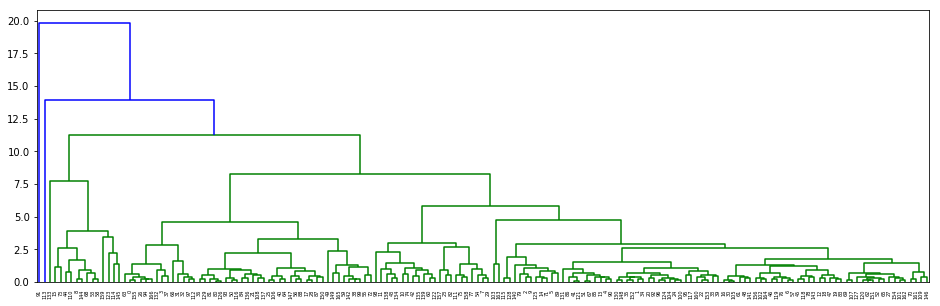

In [94]:
# complete linkage
plt.figure(figsize=(16,5))
mergings = linkage(countries_pca_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [95]:
# Dropping the column 'cluster_labels' from final countries df
countries = countries.drop(['cluster_labels'], axis=1)

In [96]:
# Trying with 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [97]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1,0


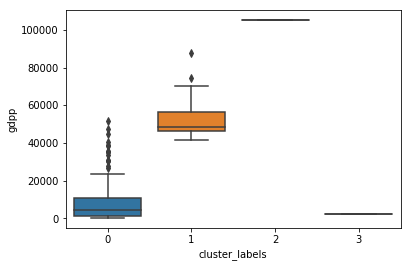

In [98]:
# plot for gdpp in all clusters
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)

In [99]:
# high gdpp
countries.loc[countries['cluster_labels']==2,['country','gdpp']]

,country,gdpp
91,Luxembourg,105000


In [100]:
# cluster-0 countries
countries.loc[countries['cluster_labels']==0,['country','gdpp']]

,country,gdpp
0,Afghanistan,553
1,Albania,4090
2,Algeria,4460
3,Angola,3530
4,Antigua and Barbuda,12200
5,Argentina,10300
6,Armenia,3220
7,Australia,51900
9,Azerbaijan,5840
10,Bahamas,28000


In [101]:
# cluster-1 countries
countries.loc[countries['cluster_labels']==1,['country','gdpp']]

,country,gdpp
8,Austria,46900
15,Belgium,44400
44,Denmark,58000
53,Finland,46200
58,Germany,41800
68,Iceland,41900
73,Ireland,48700
110,Netherlands,50300
114,Norway,87800
123,Qatar,70300


In [102]:
# cluster-3 countries
countries.loc[countries['cluster_labels']==3,['country','gdpp']]

,country,gdpp
113,Nigeria,2330


* Here, we can see that cluster-3 and cluster-2 have just one country each as shown above.
* Cluster-0 has low gdpp countries, but few countries with high gdpp like United Kingdom has been included in cluster-0 which ideally should have been present in cluster-1.
* cluster-1 has countries with high gdpp, income and low child_mort.
* So, 4 clusters does not look like the optimum clustering.Let's try again with 3 clusters

In [103]:
# Dropping the column 'cluster_labels' from final countries df
countries = countries.drop(['cluster_labels'], axis=1)

In [104]:
# Here as we can see that
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1,0


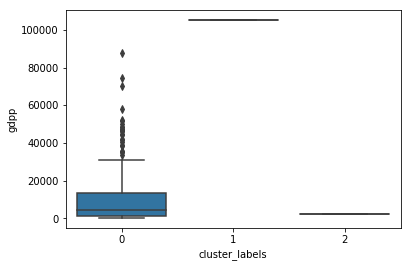

In [106]:
# plot for gdpp across all clusters
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)

So even with 3 clusters, both cluster-2 and cluster-1 have just one country. Also, cluster-0 seems to have majority of countries which includes countries with high and low gdpp values. Let's do some further analysis and check

In [107]:
# cluster-2 country
countries.loc[countries['cluster_labels']==2,['country','gdpp']]

,country,gdpp
113,Nigeria,2330


In [108]:
# low gdpp
lowgdpp_df2 = pd.DataFrame(countries.loc[countries['cluster_labels']==0,['country','gdpp']]).sort_values(by=['gdpp'])
lowgdpp_df2 = lowgdpp_df2.set_index('country')
lowgdpp_df2

,gdpp
country,
Burundi,231
Liberia,327
"Congo, Dem. Rep.",334
Niger,348
Sierra Leone,399
Madagascar,413
Mozambique,419
Central African Republic,446
Malawi,459


In [109]:
# high gdpp
countries.loc[countries['cluster_labels']==1,['country','gdpp']]

,country,gdpp
91,Luxembourg,105000


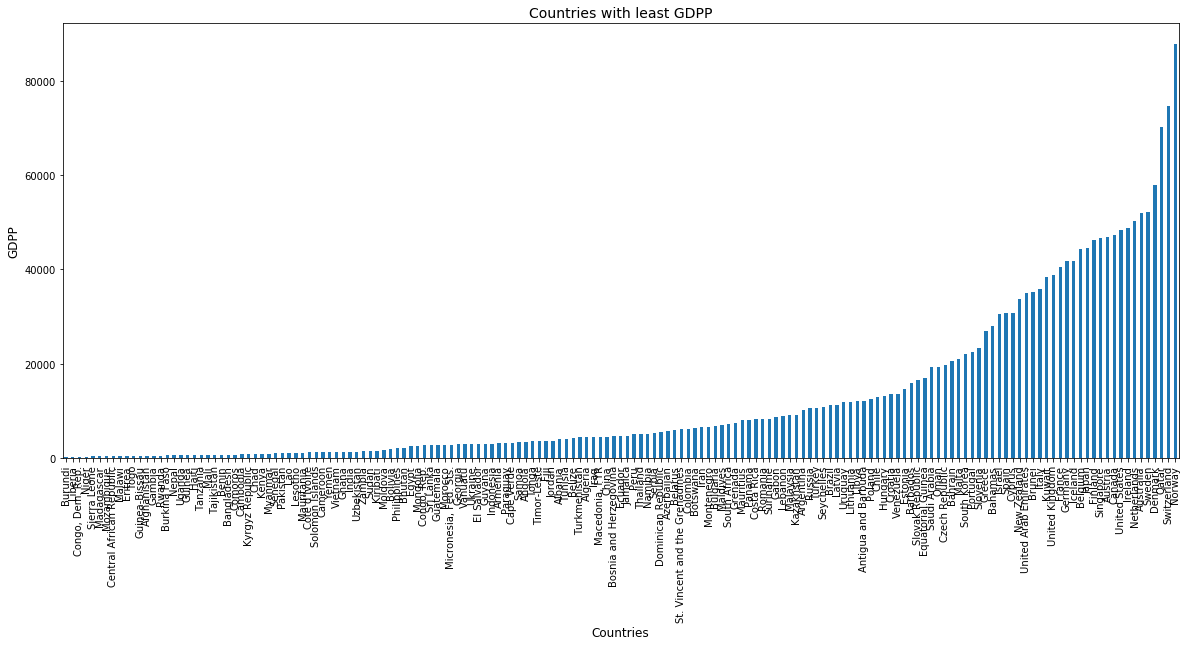

In [110]:
# Plotting and seeing cluster-0 countries
lowgdpp_df2['gdpp'].plot(kind="bar", figsize=(20,8))
plt.xlabel('Countries',fontsize=12)
plt.ylabel('GDPP',fontsize=12)
plt.title('Countries with least GDPP',fontsize=14)
plt.show()

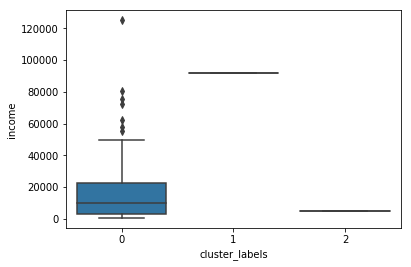

In [111]:
# plot for income across all clusters
sns.boxplot(x='cluster_labels', y='income', data=countries)

In the above plot, cluster-0 seems to have majority of countries which have both high and low-income countries and both cluster-1, cluster-2 have just one country each.

In [112]:
# low income
lowincome_df2 = pd.DataFrame(countries.loc[countries['cluster_labels']==0,['country','gdpp','income']]).sort_values(by=['income'])
lowincome_df2 = lowincome_df2.set_index('country')
lowincome_df2

,gdpp,income
country,,
"Congo, Dem. Rep.",334,609
Liberia,327,700
Burundi,231,764
Niger,348,814
Central African Republic,446,888
Mozambique,419,918
Malawi,459,1030
Guinea,648,1190
Togo,488,1210


In [113]:
# high income
countries.loc[countries['cluster_labels']==1,['country','gdpp','income']]

,country,gdpp,income
91,Luxembourg,105000,91700


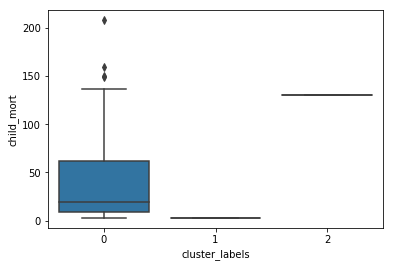

In [114]:
# plot for child_mort across all clusters
sns.boxplot(x='cluster_labels', y='child_mort', data=countries)

In the above plot, cluster-0 seems to have both low and high child_mort countries. Both cluster-2 and cluster-1 just have one country each.

In [115]:
# high child_mort income
highchildmort_df2 = pd.DataFrame(countries.loc[countries['cluster_labels']==0,['country','gdpp','income', 'child_mort']]).sort_values(by=['child_mort'], ascending=False)
highchildmort_df2 = highchildmort_df2.set_index('country')
highchildmort_df2

,gdpp,income,child_mort
country,,,
Haiti,662,1500,208.0
Sierra Leone,399,1220,160.0
Chad,897,1930,150.0
Central African Republic,446,888,149.0
Mali,708,1870,137.0
Niger,348,814,123.0
Angola,3530,5900,119.0
"Congo, Dem. Rep.",334,609,116.0
Burkina Faso,575,1430,116.0


F:\DataScience\Software\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


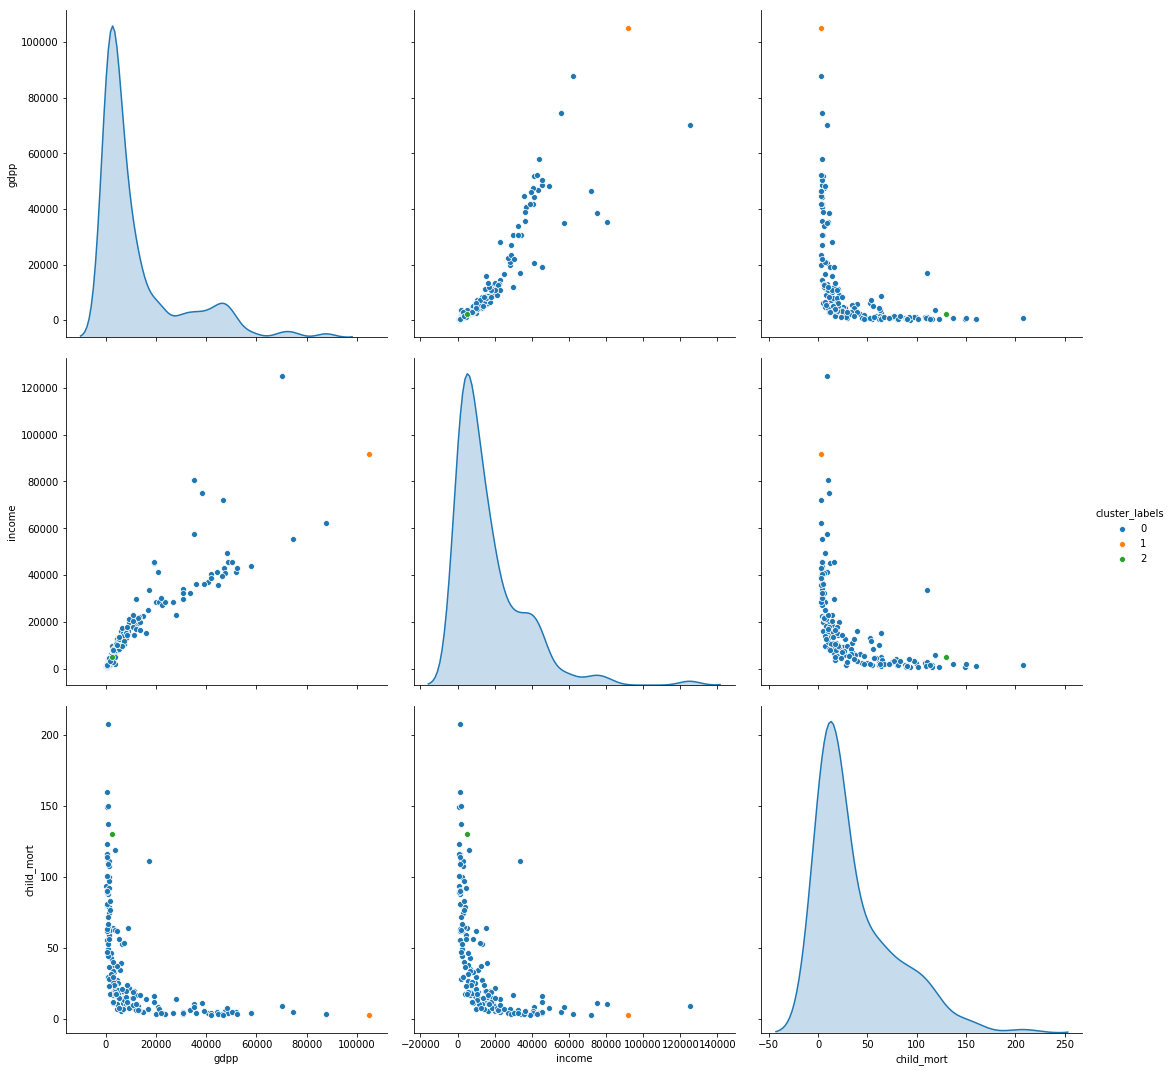

In [116]:
# Visualising the gdpp,income and child_mort variables as per Hierarchical clustering

sns.pairplot(data=countries, vars=["gdpp", "income", "child_mort"], hue='cluster_labels', size=5)

**Inference from above graphs based on Hierarchical clustering**
* As we can see, majority of the countries are in cluster-0 i.e. almost 165 countries. It has included countries which have high gdpp, high income and low child_mort countries also in this group which does not look appropriate. For e.g., countries like United Kingdom, Japan, Denmark etc. have been grouped together with countries like Central African Republic, Burundi etc. which have comparatively very low gdpp,income and high child_mort values. So, this clustering does not satisfy our business requirement.
* Only Luxembourg is present in cluster-1 and Nigeria in cluster-2.

### Final Conclusion

**Choosing K-means clustering over Hierarchical clustering due to the below given reasons**

**K-means**
* K-means has created three clusters in which cluster-0 show developed countries, cluster-1 developing countries and cluster-2 under-developed countries and which are in need of help.
* We were able to differentiate among the clusters based on gdpp, income and child_mort. cluster-0 countries have high values of gdpp, income and low values of child_mort which show a stable economy with good facilities and standard of living.
* cluster-2 countries on the other hand show low values of gdpp, income and high values of child_mort which indicate bad state of economy and poor facilities and standard of living.
* cluster-1 countries kind of grouped together countries with moderate values of gdpp, income and child_mort.

**Hierarchical**
* Hierarchical clustering also created three clusters in which majority of the countries i.e. 165 countries were grouped together in cluster-0. Only Luxembourg with highest value of income,gdpp  were grouped together in cluster-1 and Nigeria was present in cluster-2.
* Not able to derive any specific meaning w.r.t the differentiation of countries into developed, under-developed and developing.
* Few countries like United Kingdom, Japan, Denmark etc. have been grouped together with countries like Central African Republic, Burundi etc. which have comparatively very low gdpp,income and high child_mort values and eventually which does not make sense and hence does not satisfy our business requirement as well.

**Recommending few countries which are in need of urgent help amongst the under-developed countries found as a result of K-means clustering**
* Burundi
* Liberia
* Congo, Dem. rep.
* Niger
* Sierra Leone
* Haiti
* Mozambique
* Central African Republic